# Linear Regression Setup

In [1]:
# import NumPy and Pandas (for Data Manipulation)
import numpy as np
import pandas as pd

# import Seaborn (for Data Visualization)
import seaborn as sns

# import StatsModels (for Regression Evaluation)
import statsmodels.api as sm

# import Scikit-learn (for Data Pre-Processing and Linear Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# ignore user warnings
import warnings
warnings.filterwarnings ("ignore", category = UserWarning)

from tabulate import tabulate

In [2]:
# determine correlation DataFrame
df_lr2 = pd.read_csv("shark_tank_data_clean.csv")
df_heat = df_lr2.corr()
df_heat

/var/folders/r0/63gxtddj0bz9q6yx25wzhz9w0000gn/T/ipykernel_1768/3327854411.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_heat = df_lr2.corr()


,deal_True,askedfor,exchangeforstake,valuation,multEntr_True
deal_True,1.000000,-0.065916,-0.084985,-0.059805,0.046247
askedfor,-0.065916,1.000000,-0.009134,0.761365,0.037182
exchangeforstake,-0.084985,-0.009134,1.000000,-0.320508,-0.057854
valuation,-0.059805,0.761365,-0.320508,1.000000,0.025395
multEntr_True,0.046247,0.037182,-0.057854,0.025395,1.000000


<AxesSubplot: >

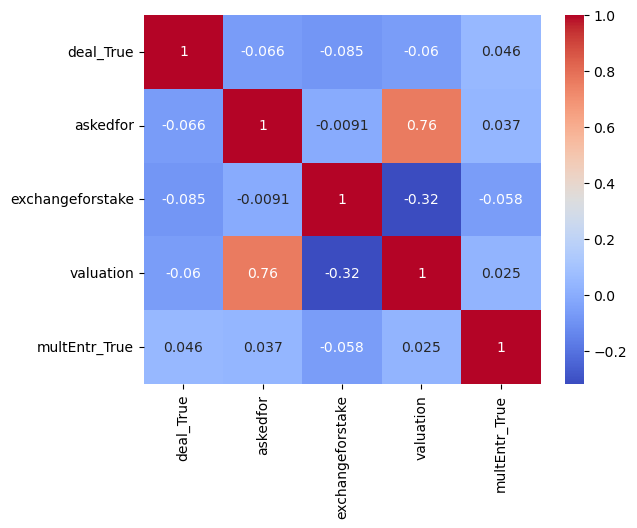

In [3]:
# plot heatmap using Seaborn
sns.heatmap(df_heat, annot = True, cmap = "coolwarm")

# Linear Regression - Multiple Entrepreneurs and Valuation

In [4]:
# print head to check success of previous code
df_lr2.head()

,deal_True,category,askedfor,exchangeforstake,valuation,title,multEntr_True
0,0,Novelties,1000000,15,6666667,Ionic Ear,0
1,1,Specialty Food,460000,10,4600000,Mr. Tod's Pie Factory,0
2,1,Baby and Child Care,50000,15,333333,Ava the Elephant,0
3,0,Consumer Services,250000,25,1000000,College Foxes Packing Boxes,0
4,0,Consumer Services,1200000,10,12000000,Wispots,0


In [5]:
# remove variables based on analysis of feature correlation
featuresToRemove = []
featuresToRemove.append("category")
featuresToRemove.append("askedfor")
featuresToRemove.append("exchangeforstake")
featuresToRemove.append("valuation")
featuresToRemove.append("title")
for featuretoRemove in featuresToRemove:
    del df_lr2[featuretoRemove]

In [6]:
# print head to check success of previous code
df_lr2.head()

,deal_True,multEntr_True
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


In [7]:
# set X and y variables
X2 = df_lr2[["multEntr_True"]]
y2 = df_lr2["deal_True"]

# create training (70%) and testing (30%) data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, 
                                                    test_size = 0.3, 
                                                    random_state = 10,
                                                    shuffle = True)

# set the ML algorithm to create the model
model = LinearRegression ()

# train the model
model.fit(X_train, y_train)

# find the y-intercept
print(model.intercept_)

# find the X coefficients
print(X2.columns)
print(model.coef_)

# create a two-column table for easy reference
model_results = pd.DataFrame(model.coef_, X2.columns, columns = ["Coefficients"])
model_results

0.4698275862068965
Index(['multEntr_True'], dtype='object')
[0.08280399]


,Coefficients
multEntr_True,0.082804


In [8]:
# prediction of model
prediction = model.predict(X_test)

# calculate MAE
metrics.mean_absolute_error(y_test, prediction)

# calculate the coefficient of determination (R-squared)
r_squared = model.score(X2, y2)

# print the R-squared value
print(r_squared)
print()

# print OLS Regression Results
results = sm.OLS(y2, X2).fit()
print(results.summary())

0.0007310476390980369

                                 OLS Regression Results                                
Dep. Variable:              deal_True   R-squared (uncentered):                   0.187
Model:                            OLS   Adj. R-squared (uncentered):              0.186
Method:                 Least Squares   F-statistic:                              113.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):                    4.65e-24
Time:                        11:32:09   Log-Likelihood:                         -482.97
No. Observations:                 495   AIC:                                      967.9
Df Residuals:                     494   BIC:                                      972.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------